# Introduction

Dataset includes 14 columns, which means 13 features and 1 target column. The problem is predicting if a person has heart disease basing on following attribute information:

# Dictionary

1. age - age in years

2. sex - (1 = male; 0 = female)

3. cp - chest pain type


    0: Typical angina: chest pain related decrease blood supply to the heart
    
    1: Atypical angina: chest pain not related to heart
    
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    
    3: Asymptomatic: chest pain not showing signs of disease
    
    
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
    
    
5. chol - serum cholestoral in mg/dl

    serum = LDL + HDL + .2 * triglycerides above 200 is cause for concern
    
    
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)    '>126' mg/dL signals diabetes


7. restecg - resting electrocardiographic results

    0: Nothing to note
    
    1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
    
    2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber
    
    
8. thalach - maximum heart rate achieved


9. exang - exercise induced angina (1 = yes; 0 = no)


10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more


11. slope - the slope of the peak exercise ST segment

    0: Upsloping: better heart rate with excercise (uncommon)
    
    1: Flatsloping: minimal change (typical healthy heart)
    
    2: Downslopins: signs of unhealthy heart
    
    
12. ca - number of major vessels (0-3) colored by flourosopy colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
    
    
13. thal - thalium stress result

    1: normal
    
    2: fixed defect: used to be defect but ok now
    
    3: reversable defect: no proper blood movement when excercising
    
    
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

Above we see which variables are numerical and continuous and which variables are categorical. In the raw dataset, data has 76 attributes but all published experiments refer to using only 14 of them. The version which we get also has 14 attributes.

for more information visit the page https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
import pandas as pd
from pandas_profiling import ProfileReport
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [187]:
data=pd.read_csv('heart.csv')

In [188]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [189]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
rest_ecg                   303 non-null int64
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null int64
st_depression              303 non-null float64
st_slope                   303 non-null int64
num_major_vessels          303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [191]:
data.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      49
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            5
thalassemia                  4
target                       2
dtype: int64

In [192]:
data.isnull().sum()*100/data.count()

age                        0.0
sex                        0.0
chest_pain_type            0.0
resting_blood_pressure     0.0
cholesterol                0.0
fasting_blood_sugar        0.0
rest_ecg                   0.0
max_heart_rate_achieved    0.0
exercise_induced_angina    0.0
st_depression              0.0
st_slope                   0.0
num_major_vessels          0.0
thalassemia                0.0
target                     0.0
dtype: float64

In [193]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Categorical variables:
* sex (0,1)

* chest_pain_type (0,1,2,3)

* fasting_blood_sugar(fbs) (0,1)

*  rest_ecg (0,1,2)

*  exercise_induced_angina ( 0,1)

*  st_slope (0,1,2)

*  num_major_vessels(0,1,2,3,4)

*  thalassemia (0,1,2,3)

* target(0,1)





## Continuous variables:

* age

*  resting_blood_pressure

*  cholesterol

*  max_heart_rate_achieved

*  st_depression



# Examine the continious variables


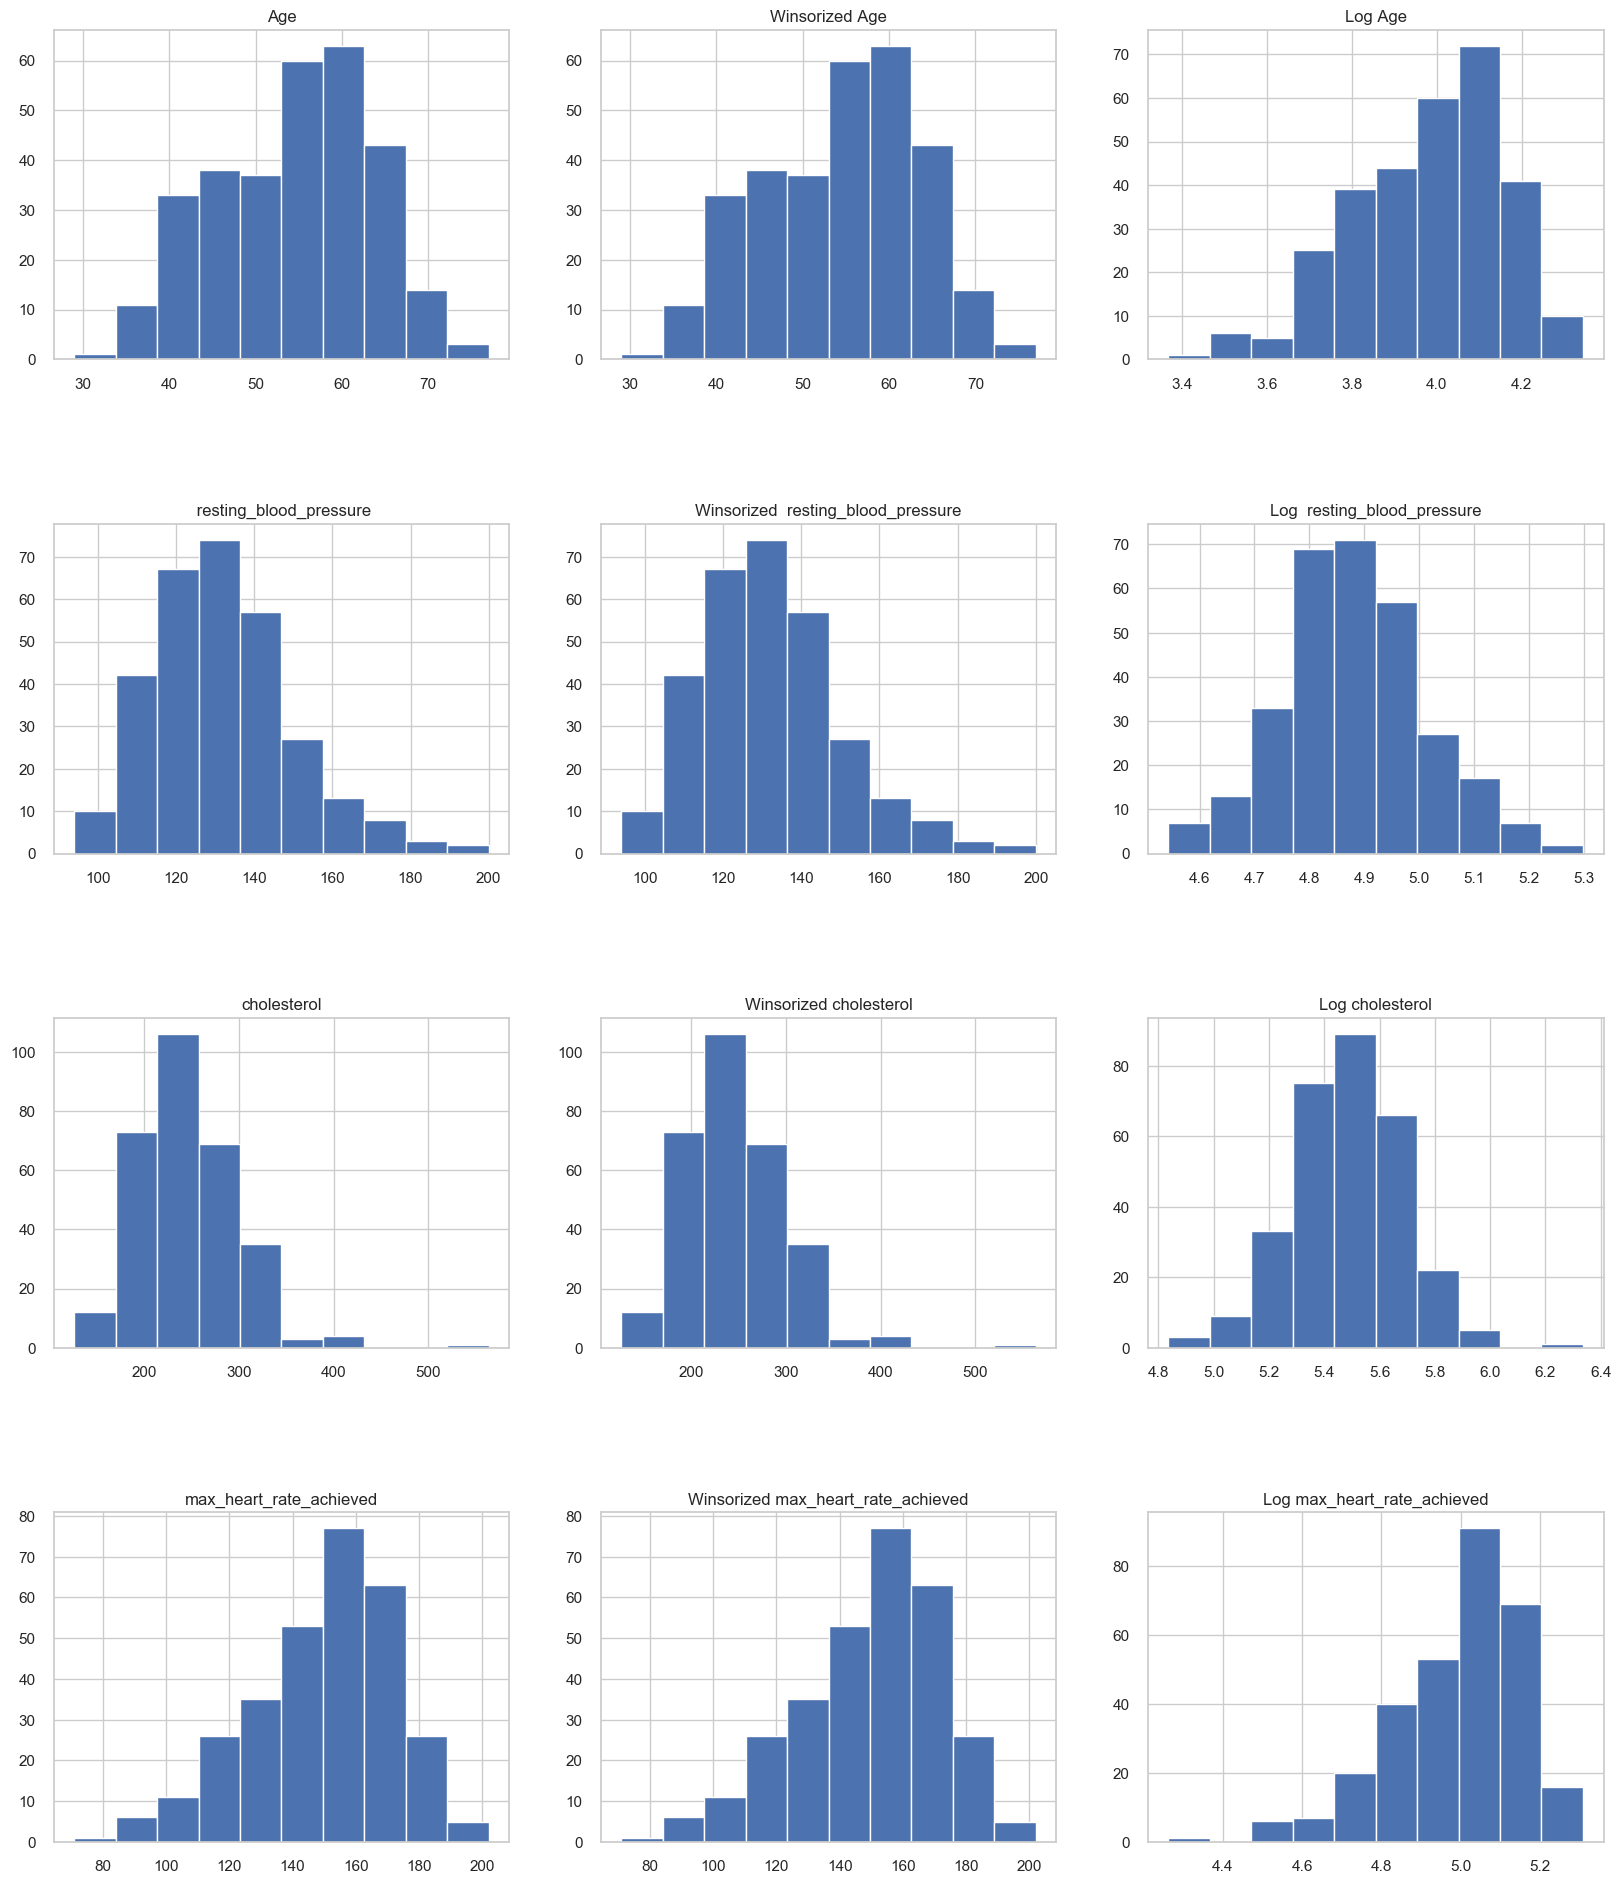

In [194]:
plt.figure(figsize = (20,24))
plt.subplots_adjust(hspace = 0.5)
plt.subplot(431)
plt.hist(data.age)
plt.title('Age')
plt.subplot(432)
plt.hist(winsorize(data.age))
plt.title('Winsorized Age')
plt.subplot(433)
plt.hist(np.log(data.age))
plt.title('Log Age')

plt.subplot(434)
plt.hist(data.resting_blood_pressure)
plt.title(' resting_blood_pressure')
plt.subplot(435)
plt.hist(winsorize(data.resting_blood_pressure))
plt.title('Winsorized  resting_blood_pressure')
plt.subplot(436)
plt.hist(np.log(data.resting_blood_pressure))
plt.title('Log  resting_blood_pressure')

plt.subplot(437)
plt.hist(data.cholesterol)
plt.title('cholesterol')
plt.subplot(438)
plt.hist(winsorize(data.cholesterol))
plt.title('Winsorized cholesterol')
plt.subplot(439)
plt.hist(np.log(data.cholesterol))
plt.title('Log cholesterol')

plt.subplot(4,3,10)
plt.hist(data.max_heart_rate_achieved)
plt.title('max_heart_rate_achieved')
plt.subplot(4,3,11)
plt.hist(winsorize(data.max_heart_rate_achieved))
plt.title('Winsorized max_heart_rate_achieved')
plt.subplot(4,3,12)
plt.hist(np.log(data.max_heart_rate_achieved))
plt.title('Log max_heart_rate_achieved')

plt.show()


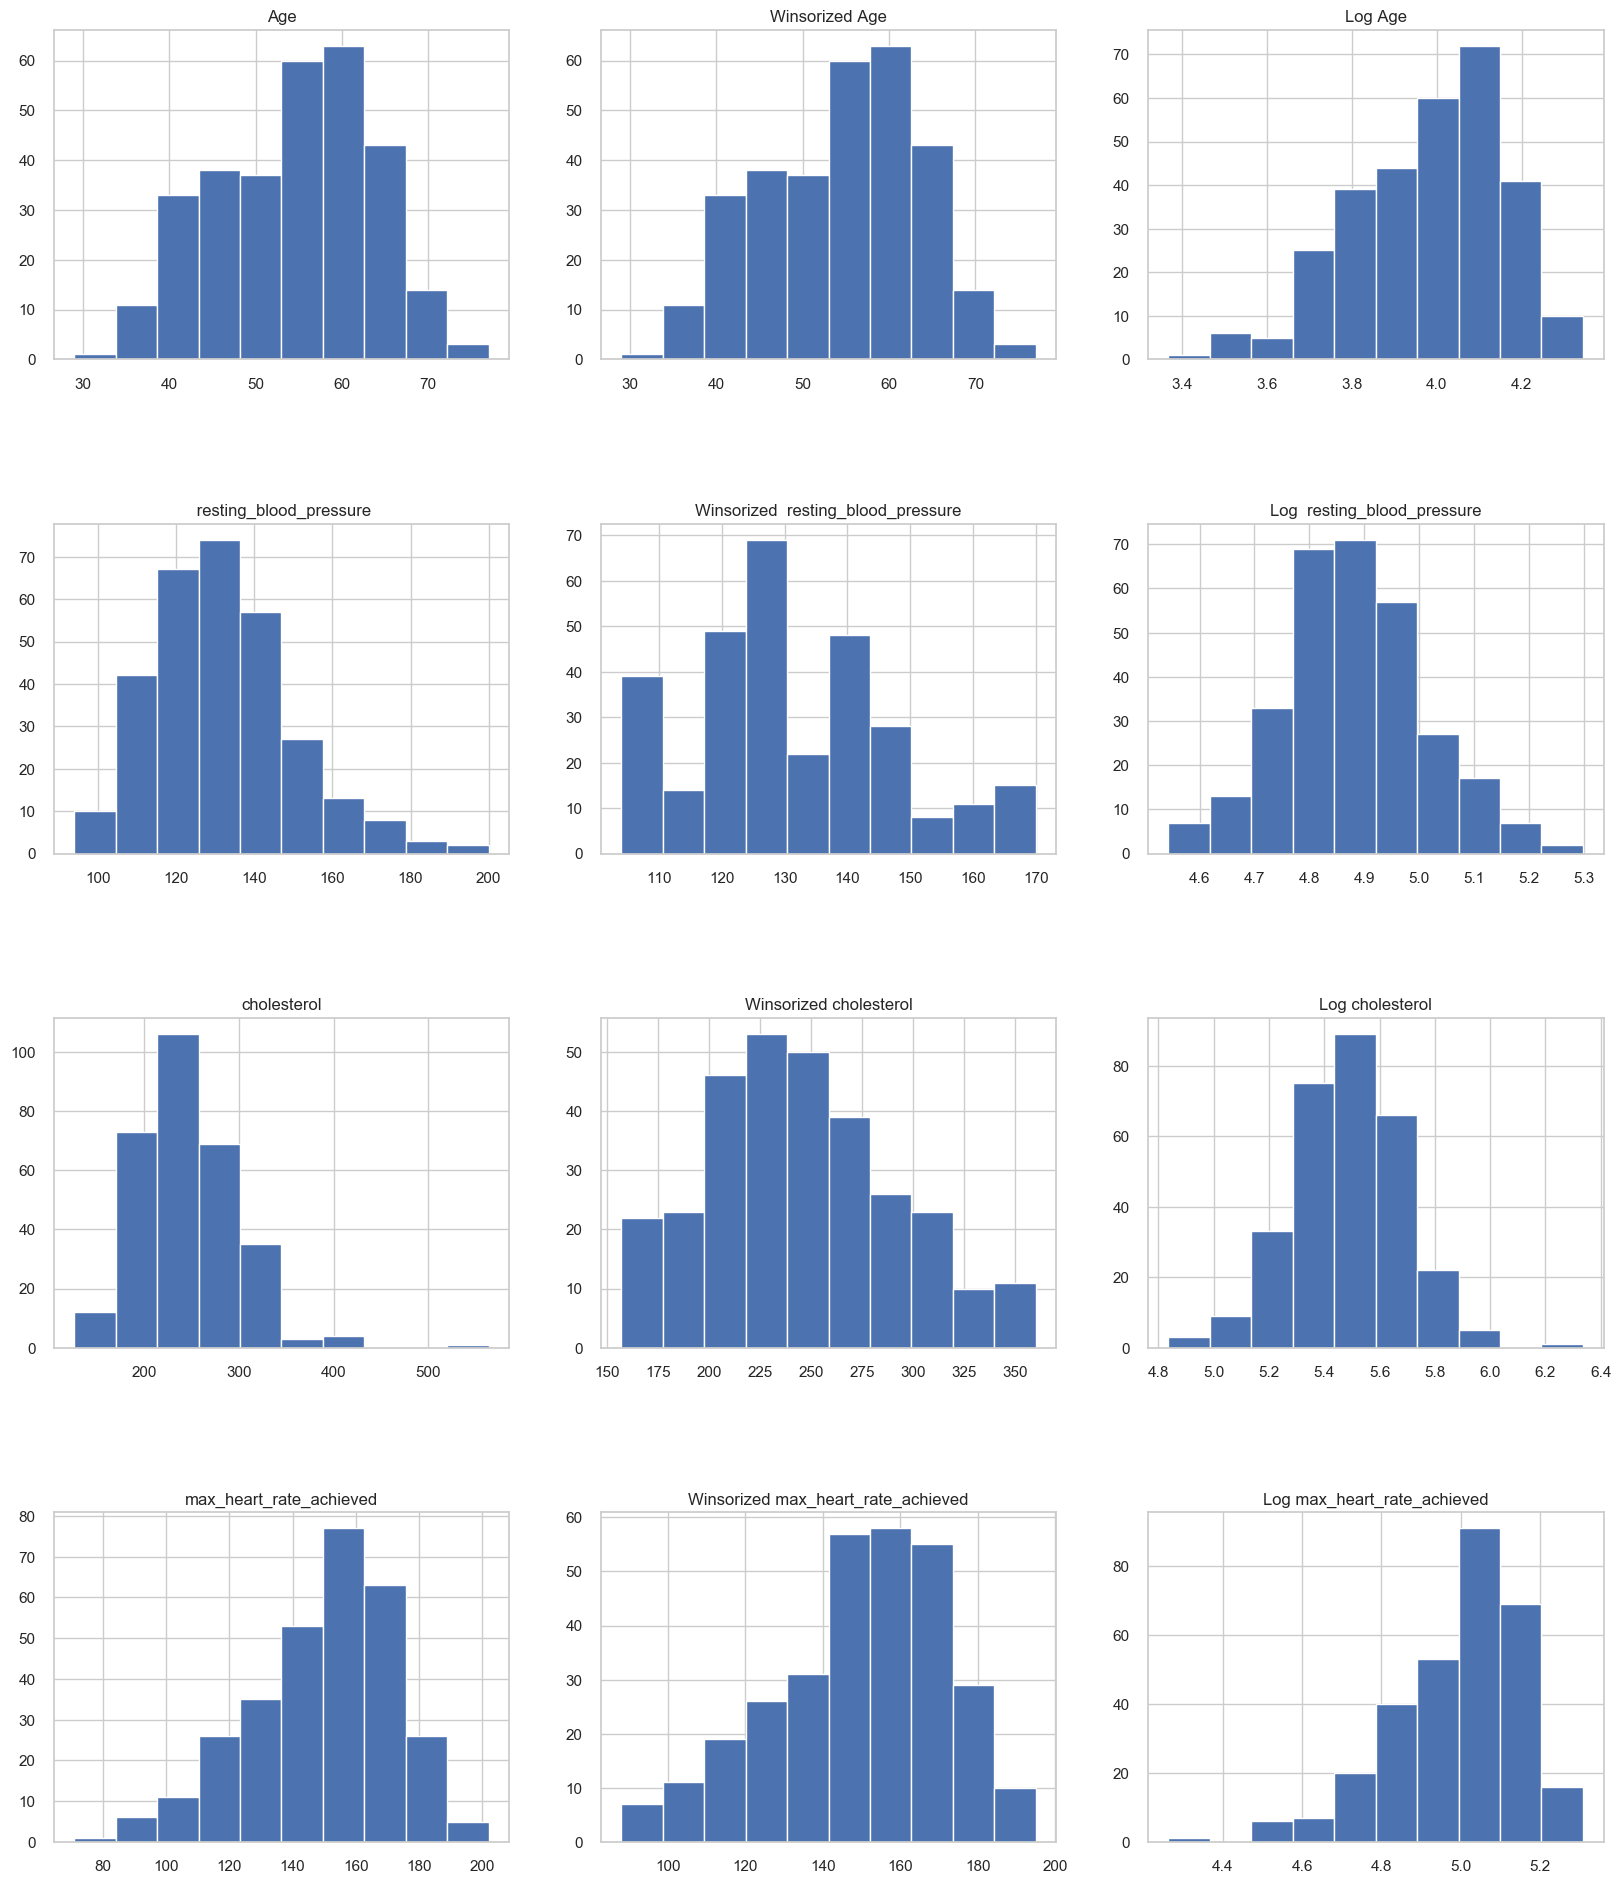

In [195]:
plt.figure(figsize = (20,24))
plt.subplots_adjust(hspace = 0.5)
plt.subplot(431)
plt.hist(data.age)
plt.title('Age')
plt.subplot(432)
plt.hist(winsorize(data.age))
plt.title('Winsorized Age')
plt.subplot(433)
plt.hist(np.log(data.age))
plt.title('Log Age')

plt.subplot(434)
plt.hist(data.resting_blood_pressure)
plt.title(' resting_blood_pressure')
plt.subplot(435)
plt.hist(winsorize(data.resting_blood_pressure,0.03))
plt.title('Winsorized  resting_blood_pressure')
plt.subplot(436)
plt.hist(np.log(data.resting_blood_pressure))
plt.title('Log  resting_blood_pressure')

plt.subplot(437)
plt.hist(data.cholesterol)
plt.title('cholesterol')
plt.subplot(438)
plt.hist(winsorize(data.cholesterol,0.017))
plt.title('Winsorized cholesterol')
plt.subplot(439)
plt.hist(np.log(data.cholesterol))
plt.title('Log cholesterol')

plt.subplot(4,3,10)
plt.hist(data.max_heart_rate_achieved)
plt.title('max_heart_rate_achieved')
plt.subplot(4,3,11)
plt.hist(winsorize(data.max_heart_rate_achieved,0.004,axis=-1))
plt.title('Winsorized max_heart_rate_achieved')
plt.subplot(4,3,12)
plt.hist(np.log(data.max_heart_rate_achieved))
plt.title('Log max_heart_rate_achieved')

plt.show()

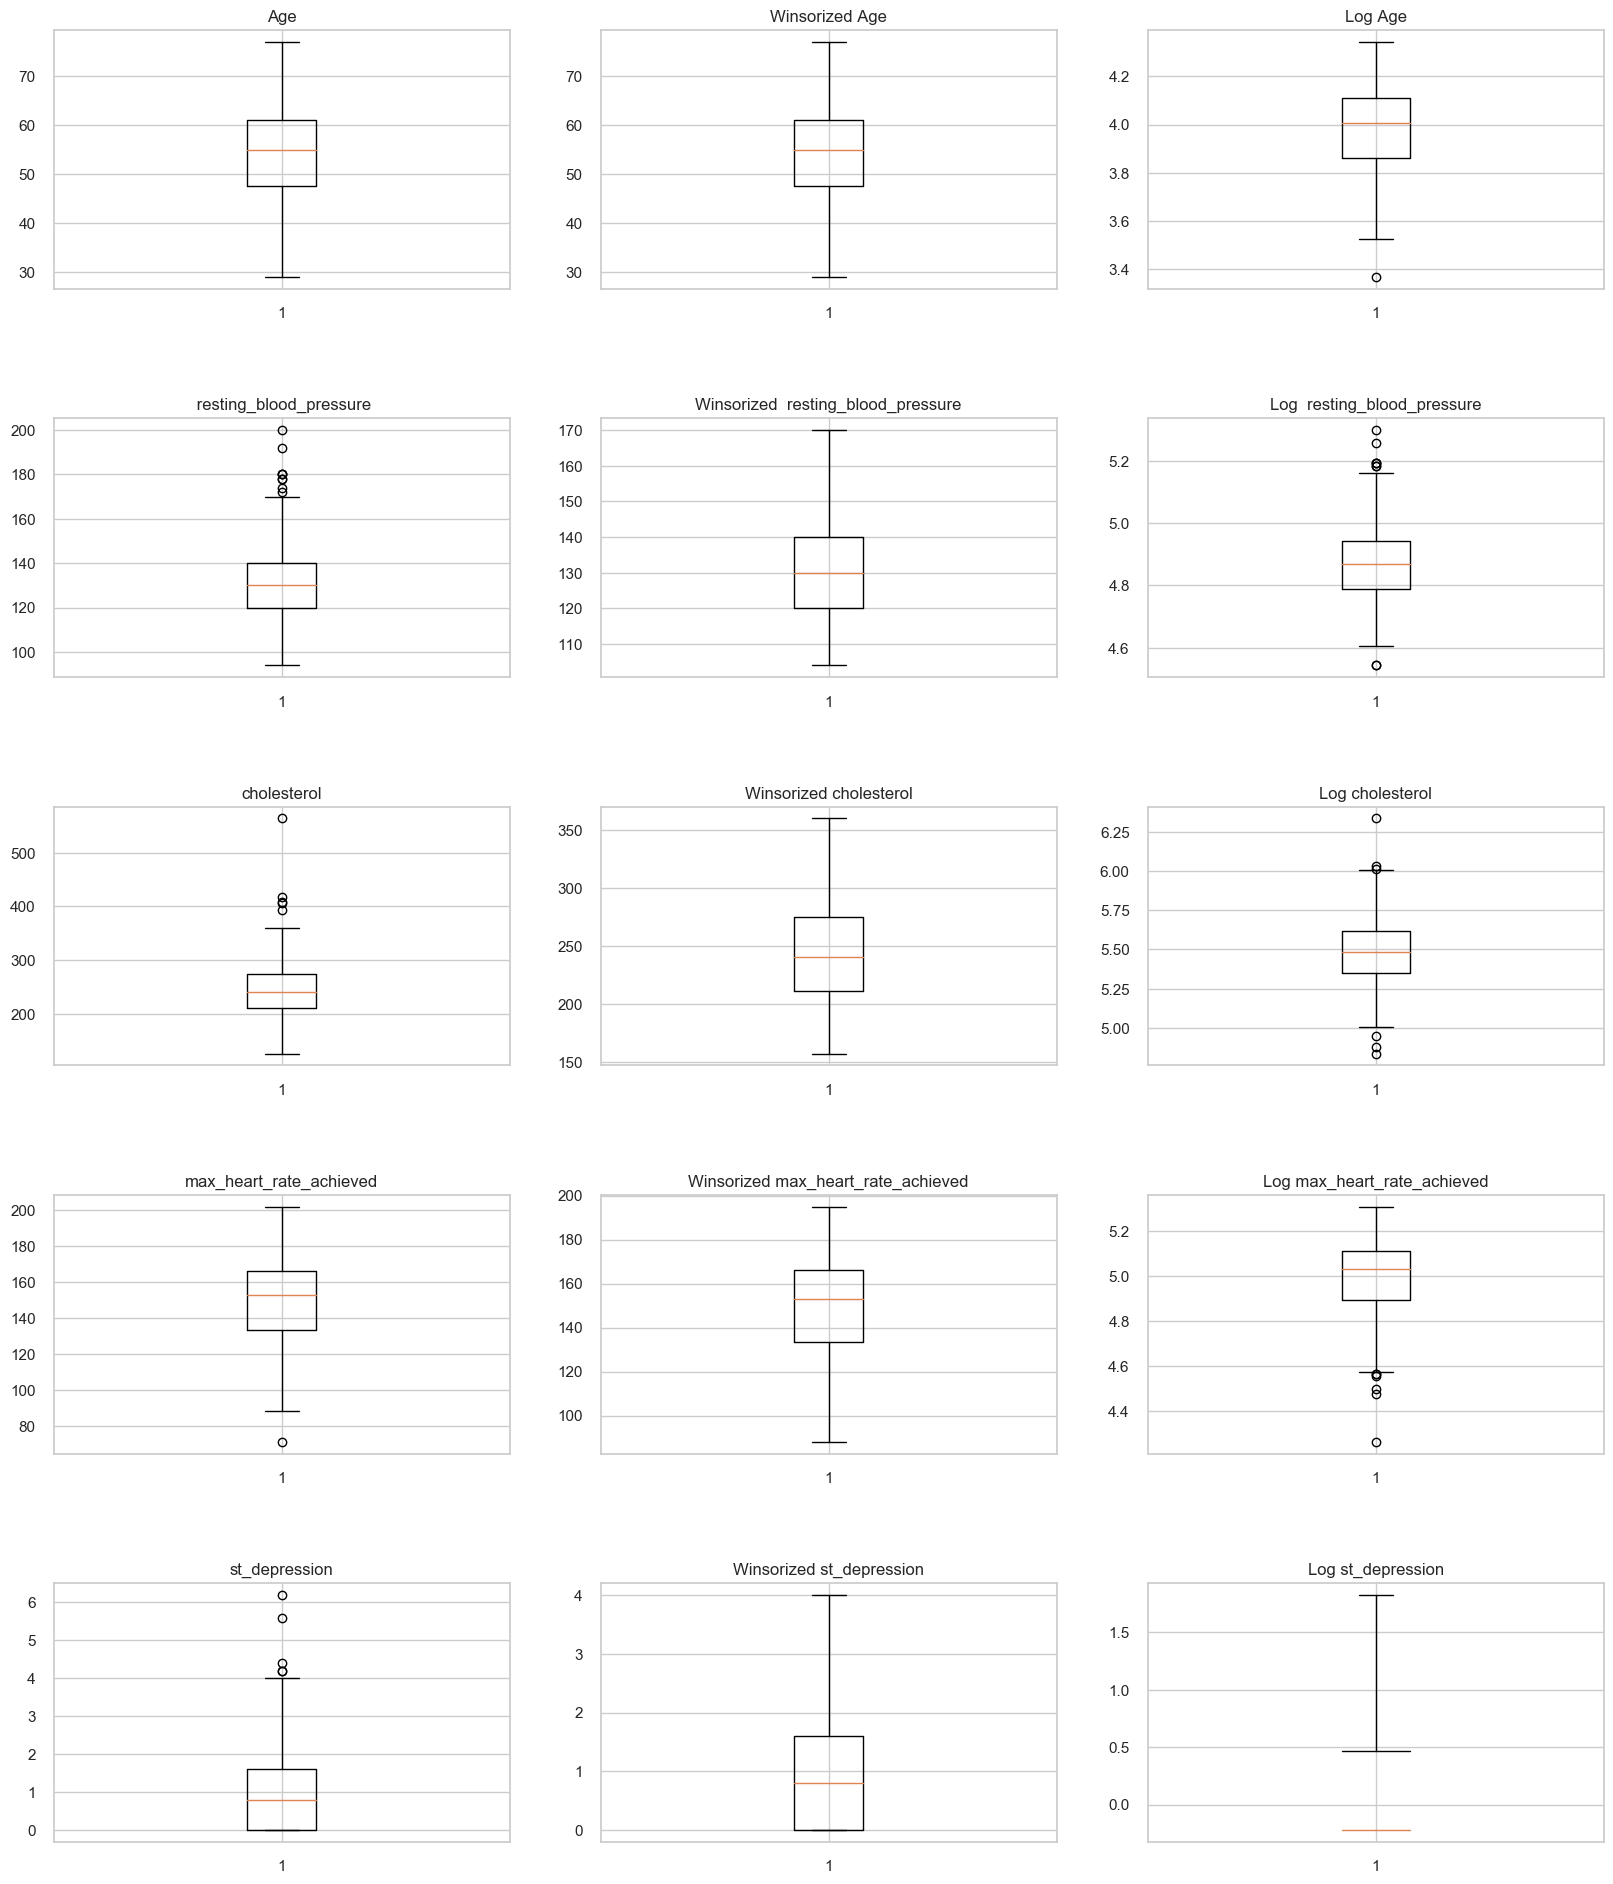

In [196]:
plt.figure(figsize = (20,24))
plt.subplots_adjust(hspace = 0.5)
plt.subplot(531)
plt.boxplot(data.age)
plt.title('Age')
plt.subplot(532)
plt.boxplot(winsorize(data.age))
plt.title('Winsorized Age')
plt.subplot(533)
plt.boxplot(np.log(data.age))
plt.title('Log Age')

plt.subplot(534)
plt.boxplot(data.resting_blood_pressure)
plt.title(' resting_blood_pressure')
plt.subplot(535)
plt.boxplot(winsorize(data.resting_blood_pressure,0.03))
plt.title('Winsorized  resting_blood_pressure')
plt.subplot(536)
plt.boxplot(np.log(data.resting_blood_pressure))
plt.title('Log  resting_blood_pressure')

plt.subplot(537)
plt.boxplot(data.cholesterol)
plt.title('cholesterol')
plt.subplot(538)
plt.boxplot(winsorize(data.cholesterol,0.017))
plt.title('Winsorized cholesterol')
plt.subplot(539)
plt.boxplot(np.log(data.cholesterol))
plt.title('Log cholesterol')

plt.subplot(5,3,10)
plt.boxplot(data.max_heart_rate_achieved)
plt.title('max_heart_rate_achieved')
plt.subplot(5,3,11)
plt.boxplot(winsorize(data.max_heart_rate_achieved,0.004, axis = -1))
plt.title('Winsorized max_heart_rate_achieved')
plt.subplot(5,3,12)
plt.boxplot(np.log(data.max_heart_rate_achieved))
plt.title('Log max_heart_rate_achieved')

plt.subplot(5,3,13)
plt.boxplot(data.st_depression)
plt.title('st_depression')
plt.subplot(5,3,14)
plt.boxplot(winsorize(data.st_depression,0.018))
plt.title('Winsorized st_depression')
plt.subplot(5,3,15)
plt.boxplot(np.log(data.st_depression))
plt.title('Log st_depression')
plt.show()

In [197]:
data.resting_blood_pressure = winsorize(data.resting_blood_pressure, 0.03)
data.cholesterol = winsorize(data.cholesterol,0.017)
data.max_heart_rate_achieved = winsorize(data.max_heart_rate_achieved, 0.004, axis = -1)
data.st_depression = winsorize(data.st_depression, 0.018)

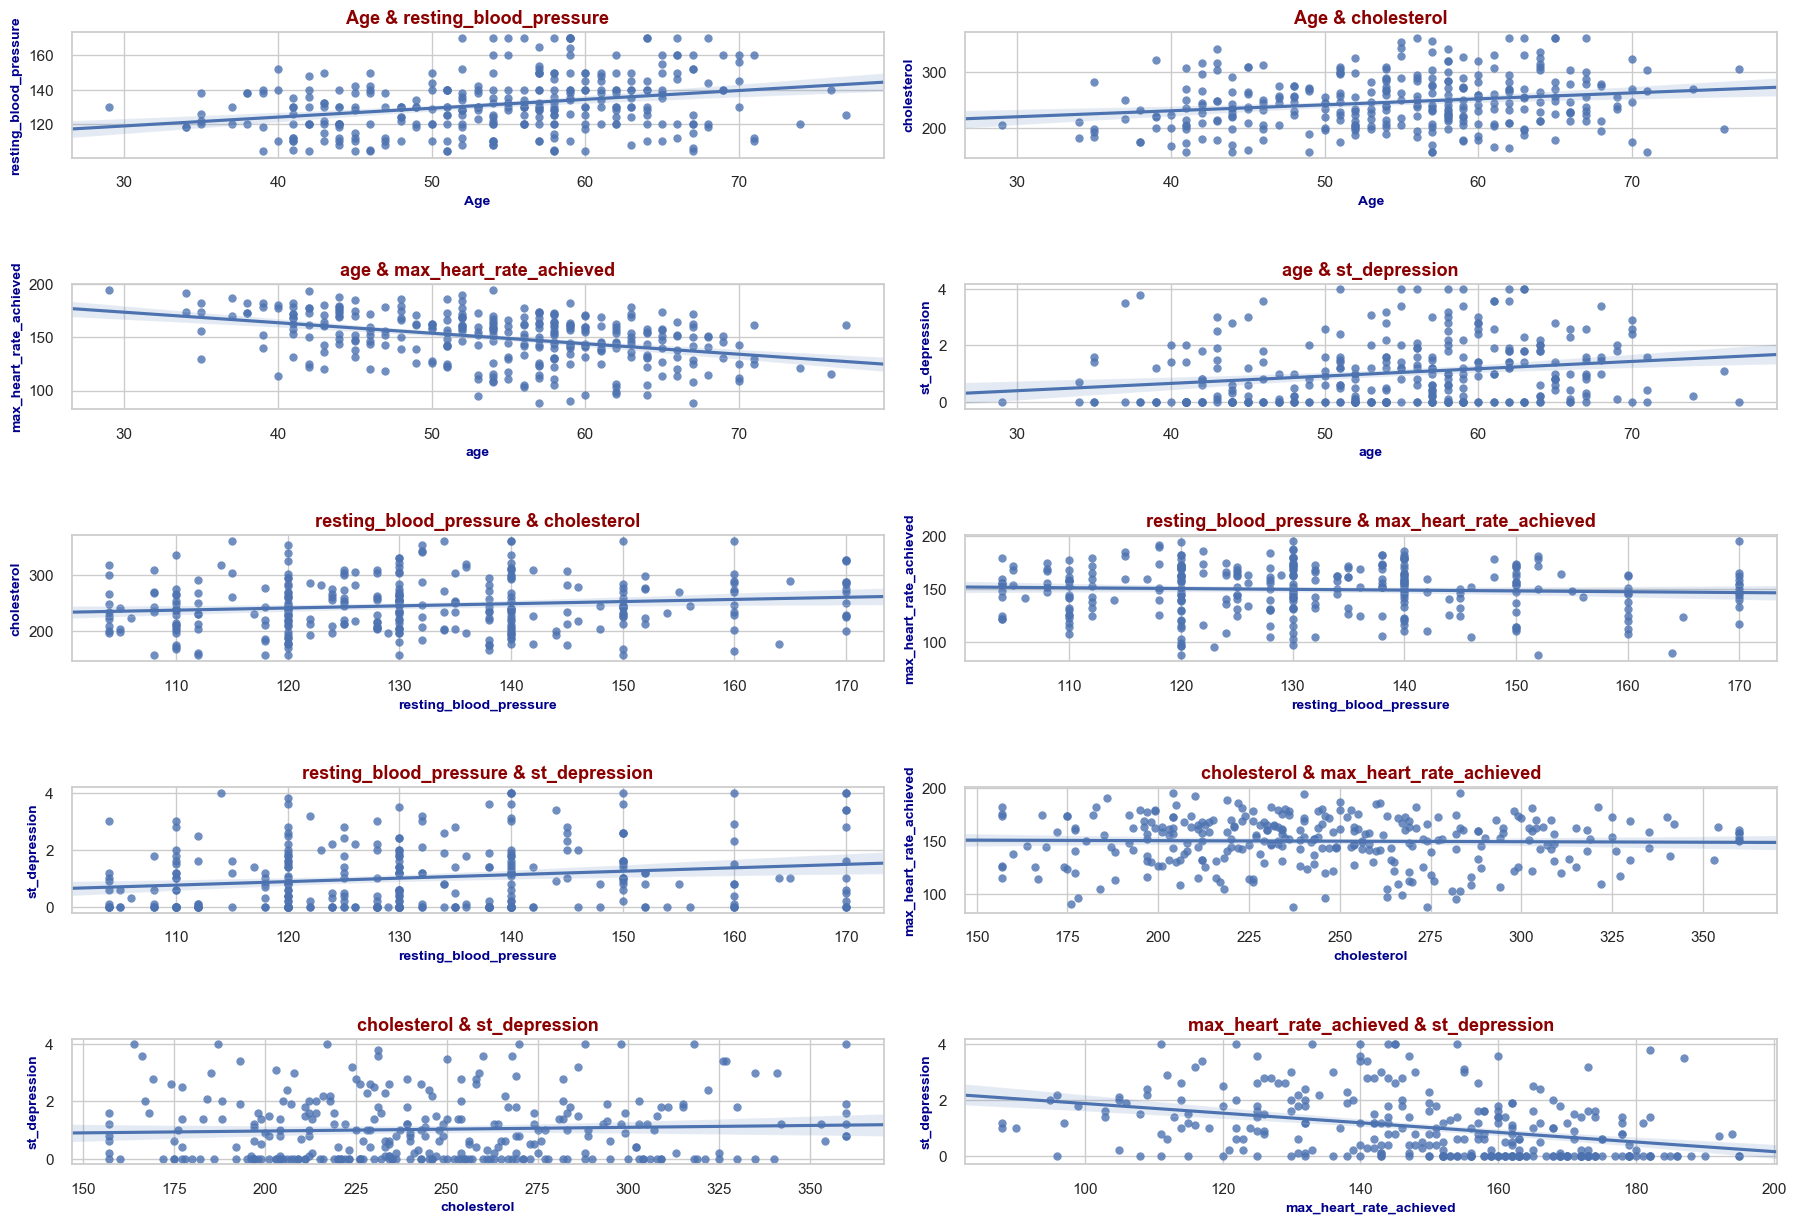

In [268]:
plt.figure(figsize=(22,15))
plt.subplots_adjust(hspace=1, wspace=0.1)

plt.subplot(5,2,1)
sns.regplot(data["age"], data["resting_blood_pressure"])
plt.title("Age & resting_blood_pressure", fontdict=baslik_font)
plt.xlabel('Age', fontdict=eksen_font )
plt.ylabel('resting_blood_pressure', fontdict=eksen_font )

plt.subplot(5,2,2)
sns.regplot(data["age"], data["cholesterol"])
plt.title("Age & cholesterol", fontdict=baslik_font)
plt.xlabel('Age', fontdict=eksen_font )
plt.ylabel('cholesterol', fontdict=eksen_font )

plt.subplot(5,2,3)
sns.regplot(data["age"], data["max_heart_rate_achieved"])
plt.title("age & max_heart_rate_achieved", fontdict=baslik_font)
plt.xlabel('age', fontdict=eksen_font )
plt.ylabel('max_heart_rate_achieved', fontdict=eksen_font )

plt.subplot(5,2,4)
sns.regplot(data["age"], data["st_depression"])
plt.title("age & st_depression", fontdict=baslik_font)
plt.xlabel('age', fontdict=eksen_font )
plt.ylabel('st_depression', fontdict=eksen_font )

plt.subplot(5,2,5)
sns.regplot(data["resting_blood_pressure"], data["cholesterol"])
plt.title("resting_blood_pressure & cholesterol", fontdict=baslik_font)
plt.xlabel('resting_blood_pressure', fontdict=eksen_font )
plt.ylabel('cholesterol', fontdict=eksen_font )

plt.subplot(5,2,6)
sns.regplot(data["resting_blood_pressure"], data["max_heart_rate_achieved"])
plt.title("resting_blood_pressure & max_heart_rate_achieved", fontdict=baslik_font)
plt.xlabel('resting_blood_pressure', fontdict=eksen_font )
plt.ylabel('max_heart_rate_achieved', fontdict=eksen_font )

plt.subplot(5,2,7)
sns.regplot(data["resting_blood_pressure"], data["st_depression"])
plt.title("resting_blood_pressure & st_depression", fontdict=baslik_font)
plt.xlabel('resting_blood_pressure', fontdict=eksen_font )
plt.ylabel('st_depression', fontdict=eksen_font )

plt.subplot(5,2,8)
sns.regplot(data["cholesterol"], data["max_heart_rate_achieved"])
plt.title("cholesterol & max_heart_rate_achieved", fontdict=baslik_font)
plt.xlabel('cholesterol', fontdict=eksen_font )
plt.ylabel('max_heart_rate_achieved', fontdict=eksen_font )

plt.subplot(5,2,9)
sns.regplot(data["cholesterol"], data["st_depression"])
plt.title("cholesterol & st_depression", fontdict=baslik_font)
plt.xlabel('cholesterol', fontdict=eksen_font )
plt.ylabel('st_depression', fontdict=eksen_font )

plt.subplot(5,2,10)
sns.regplot(data["max_heart_rate_achieved"], data["st_depression"])
plt.title("max_heart_rate_achieved & st_depression", fontdict=baslik_font)
plt.xlabel('max_heart_rate_achieved', fontdict=eksen_font )
plt.ylabel('st_depression', fontdict=eksen_font )


plt.show()


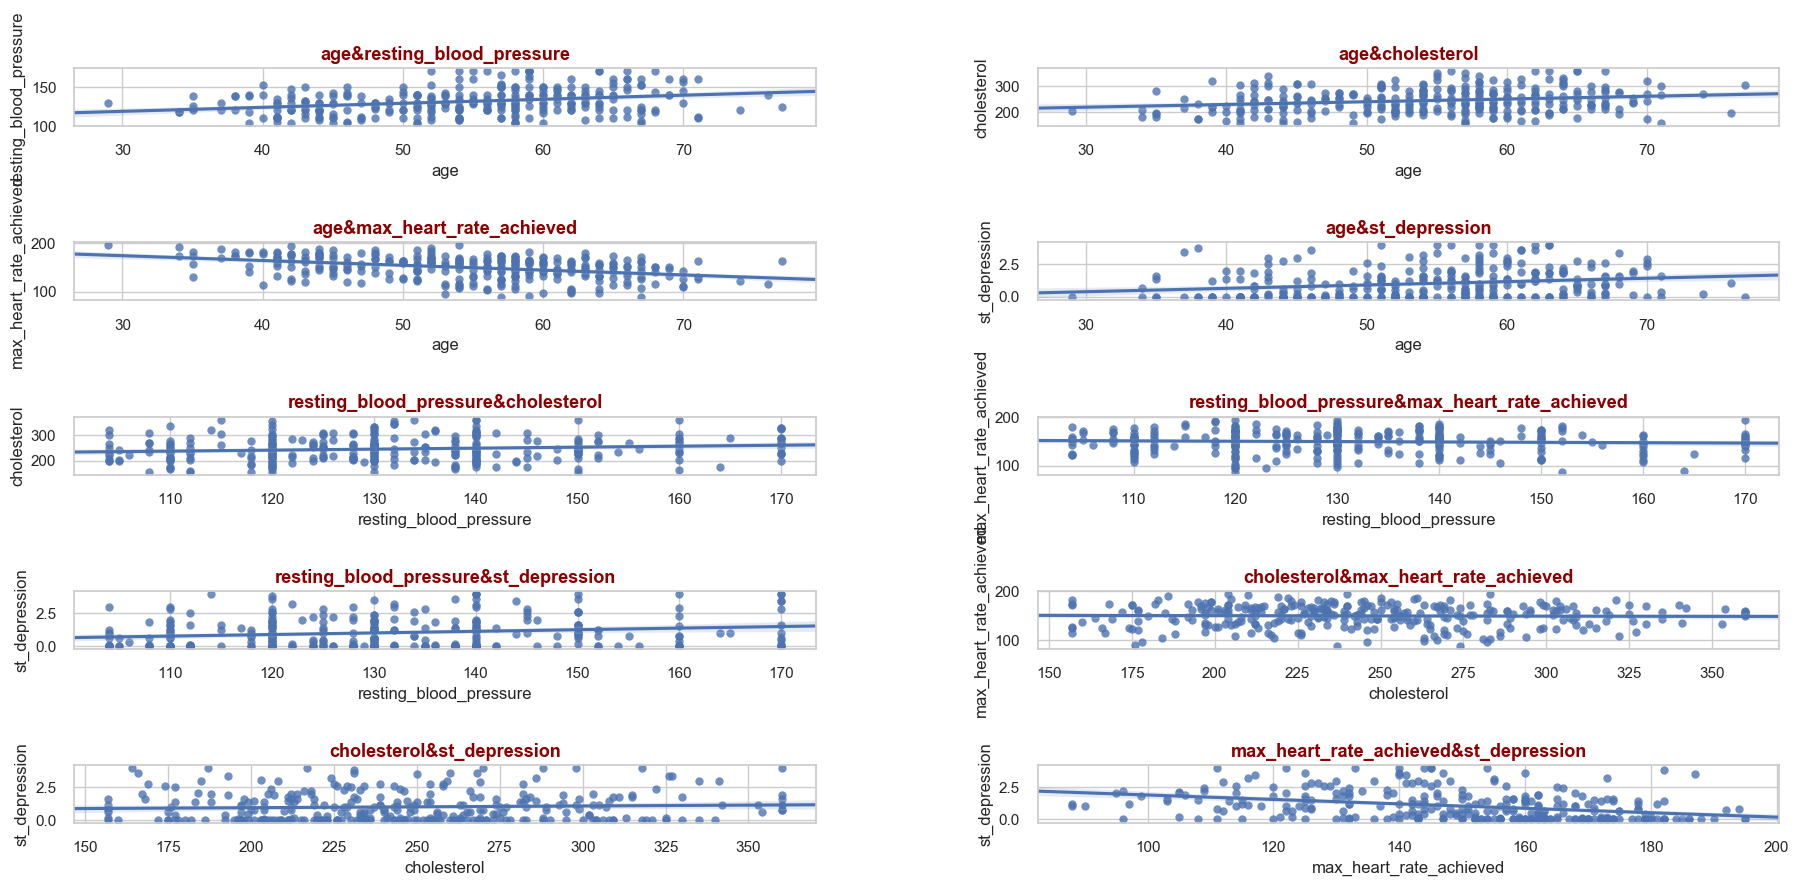

In [270]:
plt.figure(figsize=(22,10))
plt.subplots_adjust(hspace=2, wspace=0.3)

degis=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']

for i in range(4):
    for j in range(i+1,5):
        a=(i*3)+j
        if a==9 :
            a-=1
        if a==10:
            a-=1
        if a==13:
            a=10
        
        plt.subplot(5,2,a)
        sns.regplot(data[degis[i]], data[degis[j]])
        plt.title(degis[i]+"&"+degis[j], fontdict=baslik_font)
        plt.xlabel(degis[i])
        plt.ylabel(degis[j])

# Examine the categorical variables

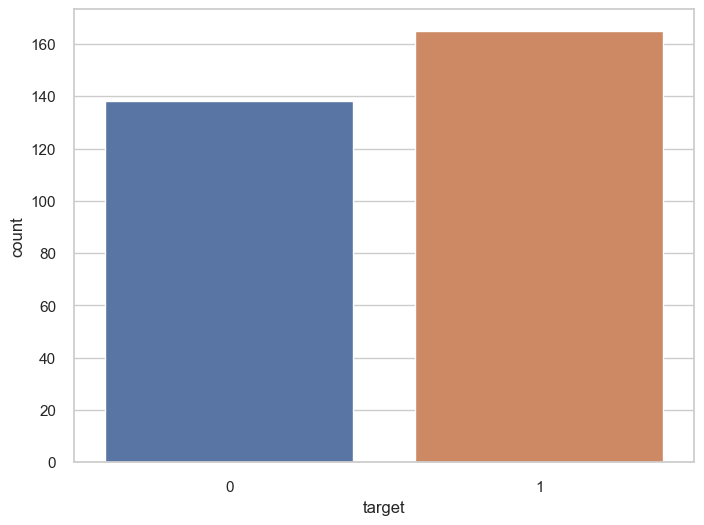

In [200]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=data)
plt.show()

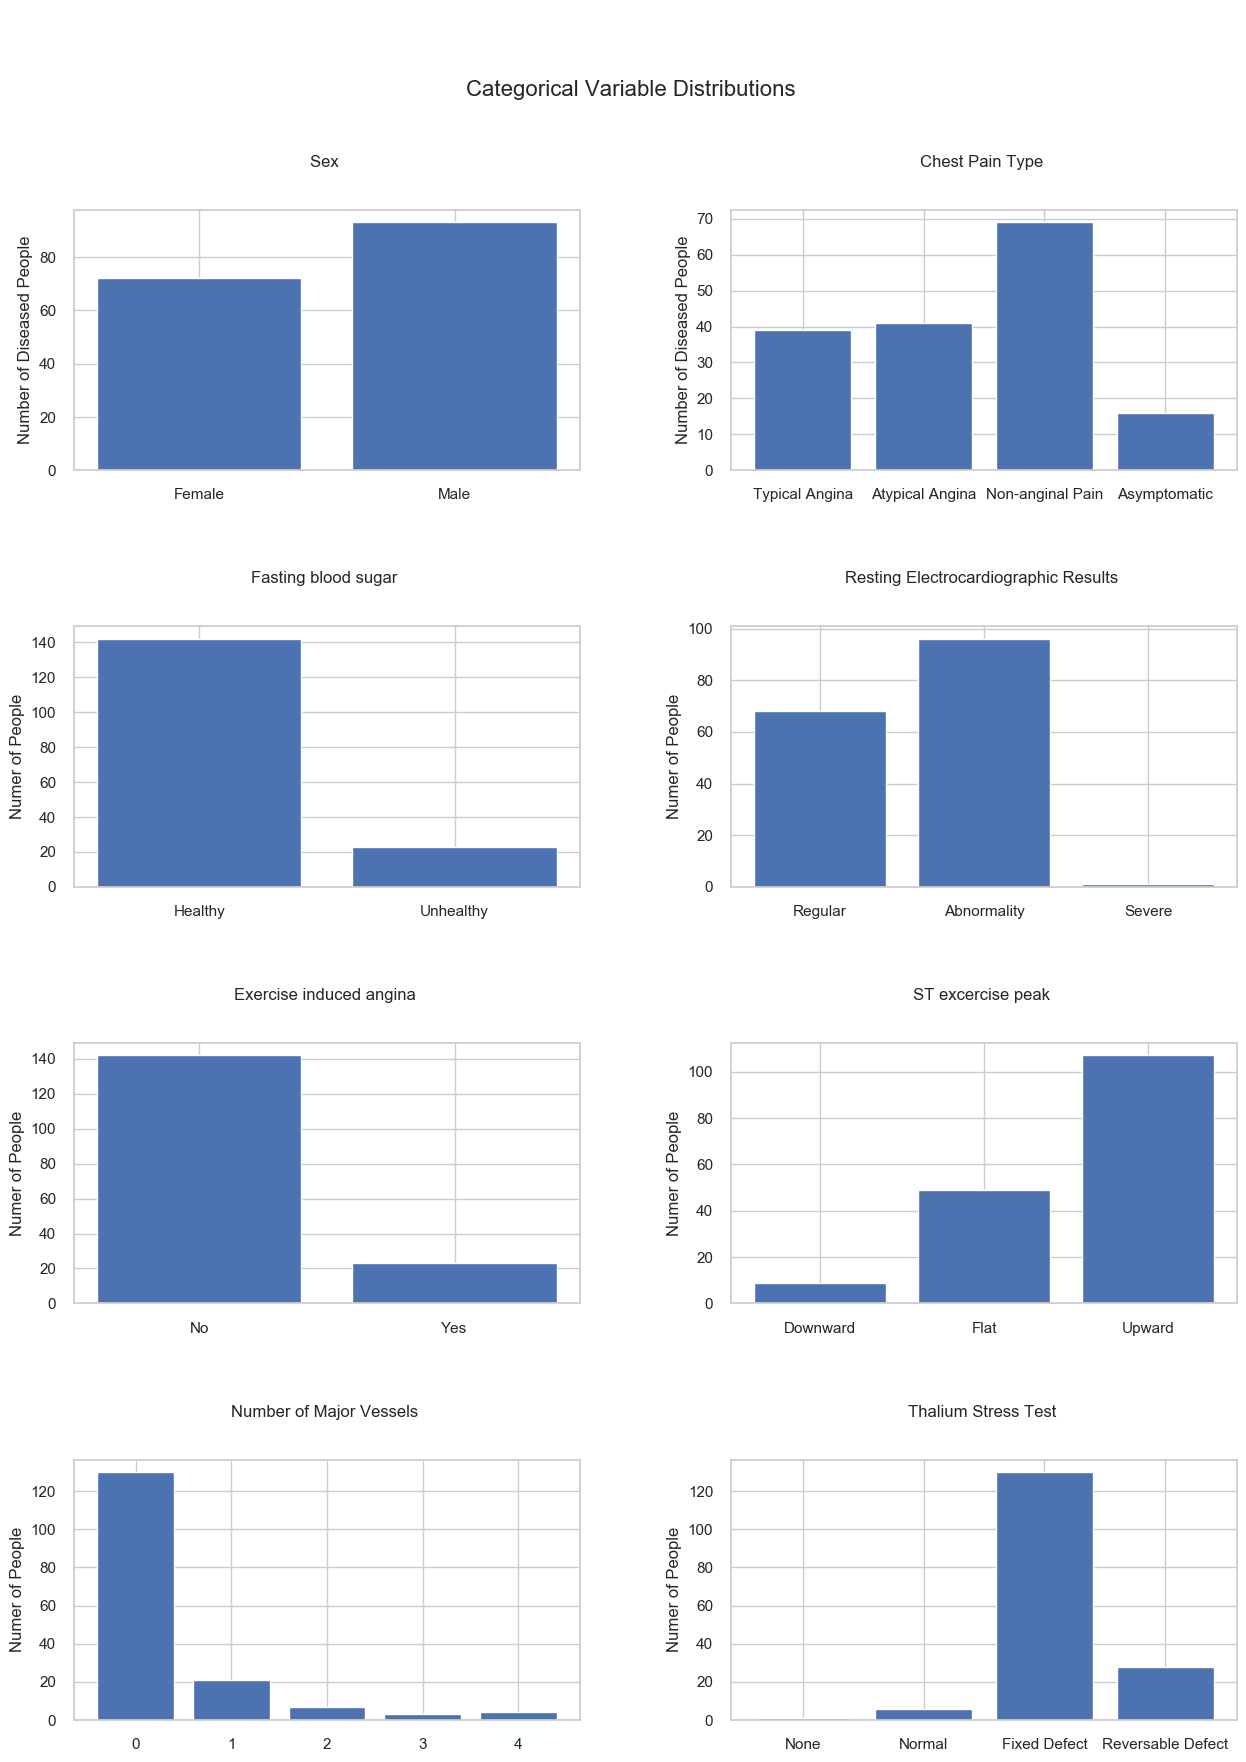

In [257]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,20))
fig.suptitle('\n \n \nCategorical Variable Distributions  \n \n', fontsize = 16)
plt.subplots_adjust(wspace=0.3, hspace=0.6)
x = ['Female', 'Male']
y = data[data['target']==1].sex.value_counts(sort = False).values 
axes[0][0].bar(x,y)
axes[0][0].set_title('Sex \n\n')
axes[0][0].set_ylabel('Number of Diseased People')

x = ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']
y = data[data['target']==1]. chest_pain_type.value_counts(sort=False).values
axes[0][1].bar(x,y)
axes[0][1].set_title('Chest Pain Type \n \n')
axes[0][1].set_ylabel('Number of Diseased People')

x = ['Healthy', 'Unhealthy']
y = data[data['target']==1]. fasting_blood_sugar.value_counts(sort = False).values
axes[1][0].bar(x,y)
axes[1][0].set_title('Fasting blood sugar \n\n')
axes[1][0].set_ylabel('Numer of People')

x = ['Regular', 'Abnormality', 'Severe']
y = data[data['target']==1]. rest_ecg.value_counts(sort = False).values
axes[1][1].bar(x,y)
axes[1][1].set_title('Resting Electrocardiographic Results \n \n')
axes[1][1].set_ylabel('Numer of People')

x = ['No', 'Yes']
y = data[data['target']==1]. exercise_induced_angina.value_counts(sort = False).values
axes[2][0].bar(x,y)
axes[2][0].set_title('Exercise induced angina \n\n')
axes[2][0].set_ylabel('Numer of People')

x = ['Downward','Flat','Upward']
y = data[data['target']==1]. st_slope.value_counts(sort = False).values
axes[2][1].bar(x,y)
axes[2][1].set_title('ST excercise peak \n \n')
axes[2][1].set_ylabel('Numer of People')

x = ['0','1','2','3','4']
y = data[data['target']==1]. num_major_vessels.value_counts(sort = False).values
axes[3][0].bar(x,y)
axes[3][0].set_title('Number of Major Vessels \n \n')
axes[3][0].set_ylabel('Numer of People')

x = ['None','Normal','Fixed Defect','Reversable Defect']
y = data[data['target']==1]. thalassemia.value_counts(sort = False).values
axes[3][1].bar(x,y)
axes[3][1].set_title('Thalium Stress Test \n \n')
axes[3][1].set_ylabel('Numer of People')
plt.show()


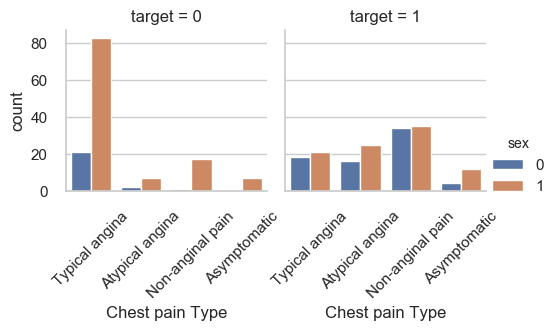

In [249]:
ax = sns.catplot(x="chest_pain_type", hue="sex", col="target",data=data, kind="count",height=2.7
                 , aspect=.9)
ax.set_axis_labels("Chest pain Type", "count")
ax.set_xticklabels(["Typical angina", "Atypical angina","Non-anginal pain","Asymptomatic"],rotation=45)
plt.show()

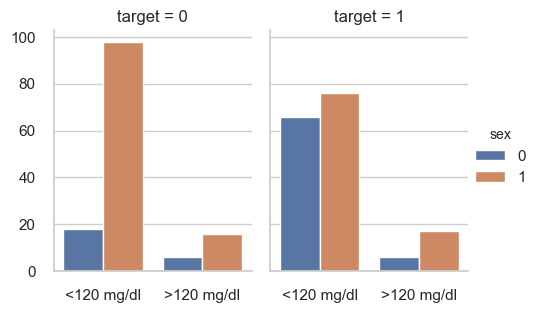

In [250]:
ax = sns.catplot(x="fasting_blood_sugar", hue="sex", col="target",
                data=data, kind="count",
                height=3.5, aspect=.7)
ax.set_axis_labels("", "")
ax.set_xticklabels(["<120 mg/dl", ">120 mg/dl"])
plt.show()

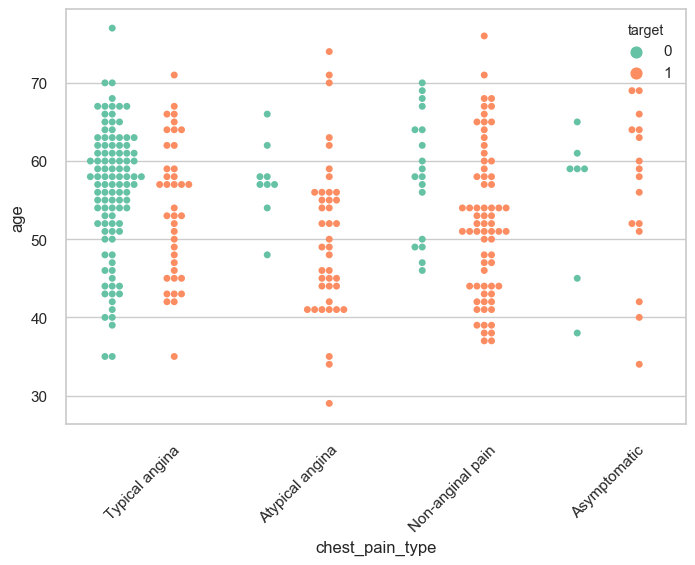

In [261]:
ax = sns.swarmplot(x=data.chest_pain_type,y=data.age,hue=data.target,palette="Set2", dodge=True)
ax.set_xticklabels(["Typical angina", "Atypical angina","Non-anginal pain","Asymptomatic"],rotation=45)
plt.show()

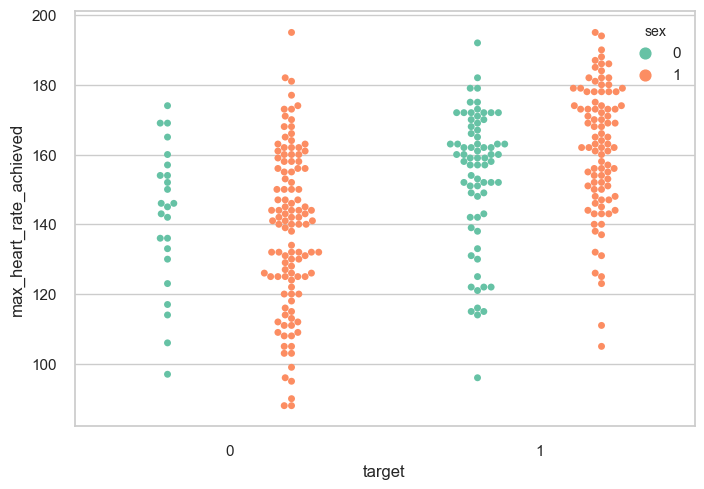

In [264]:
a1=sns.swarmplot(x=data.target,y=data.max_heart_rate_achieved,hue=data.sex,palette="Set2",dodge=True)

# T test on continuous variables according to the diagnosed people

In [343]:
t_age = stats.ttest_ind(data[data['target']==0].age, data[data['target']==1].age)
t_rbp = stats.ttest_ind(data[data['target']==0].resting_blood_pressure, data[data['target']==1].resting_blood_pressure)
t_chol = stats.ttest_ind(data[data['target']==0].cholesterol, data[data['target']==1].cholesterol)    
t_max_heart = stats.ttest_ind(data[data['target']==0].max_heart_rate_achieved, data[data['target']==1].max_heart_rate_achieved)    
t_st = stats.ttest_ind(data[data['target']==0].st_depression, data[data['target']==1].st_depression)  

degis=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression']
t_test=[t_age,t_rbp,t_chol,t_max_heart,t_st]
for i in range(5):
    print('T_Tests results for {} : {}'.format(degis[i],t_test[i]))



T_Tests results for age : Ttest_indResult(statistic=4.014560975148874, pvalue=7.524801303442373e-05)
T_Tests results for resting_blood_pressure : Ttest_indResult(statistic=2.384497019636299, pvalue=0.01772166556165761)
T_Tests results for cholesterol : Ttest_indResult(statistic=1.8450949469288447, pvalue=0.06600591944411106)
T_Tests results for max_heart_rate_achieved : Ttest_indResult(statistic=-8.081413505135504, pvalue=1.5685961884291452e-14)
T_Tests results for st_depression : Ttest_indResult(statistic=8.4214886230112, pvalue=1.5402537989685674e-15)


# Correlations of variables for diagnosed people

In [347]:
data.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.287212,0.207871,0.121308,-0.116211,-0.396133,0.096801,0.213242,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.050272,-0.179071,0.045032,-0.058196,-0.043460,0.141664,0.105256,-0.030711,0.118261,0.210041,-0.280937
chest_pain_type,-0.068653,-0.049353,1.000000,0.059819,-0.093961,0.094444,0.044421,0.296311,-0.394280,-0.144957,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.287212,-0.050272,0.059819,1.000000,0.134504,0.169199,-0.114455,-0.054047,0.057959,0.178042,-0.111675,0.103120,0.052323,-0.136160
cholesterol,0.207871,-0.179071,-0.093961,0.134504,1.000000,0.018579,-0.135738,-0.020637,0.086142,0.054260,0.007353,0.078930,0.092844,-0.105753
fasting_blood_sugar,0.121308,0.045032,0.094444,0.169199,0.018579,1.000000,-0.084189,-0.009260,0.025665,0.011732,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114455,-0.135738,-0.084189,1.000000,0.047811,-0.070733,-0.062437,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate_achieved,-0.396133,-0.043460,0.296311,-0.054047,-0.020637,-0.009260,0.047811,1.000000,-0.383551,-0.351800,0.387982,-0.216313,-0.098135,0.422244
exercise_induced_angina,0.096801,0.141664,-0.394280,0.057959,0.086142,0.025665,-0.070733,-0.383551,1.000000,0.299565,-0.257748,0.115739,0.206754,-0.436757
st_depression,0.213242,0.105256,-0.144957,0.178042,0.054260,0.011732,-0.062437,-0.351800,0.299565,1.000000,-0.573853,0.218187,0.208407,-0.436680


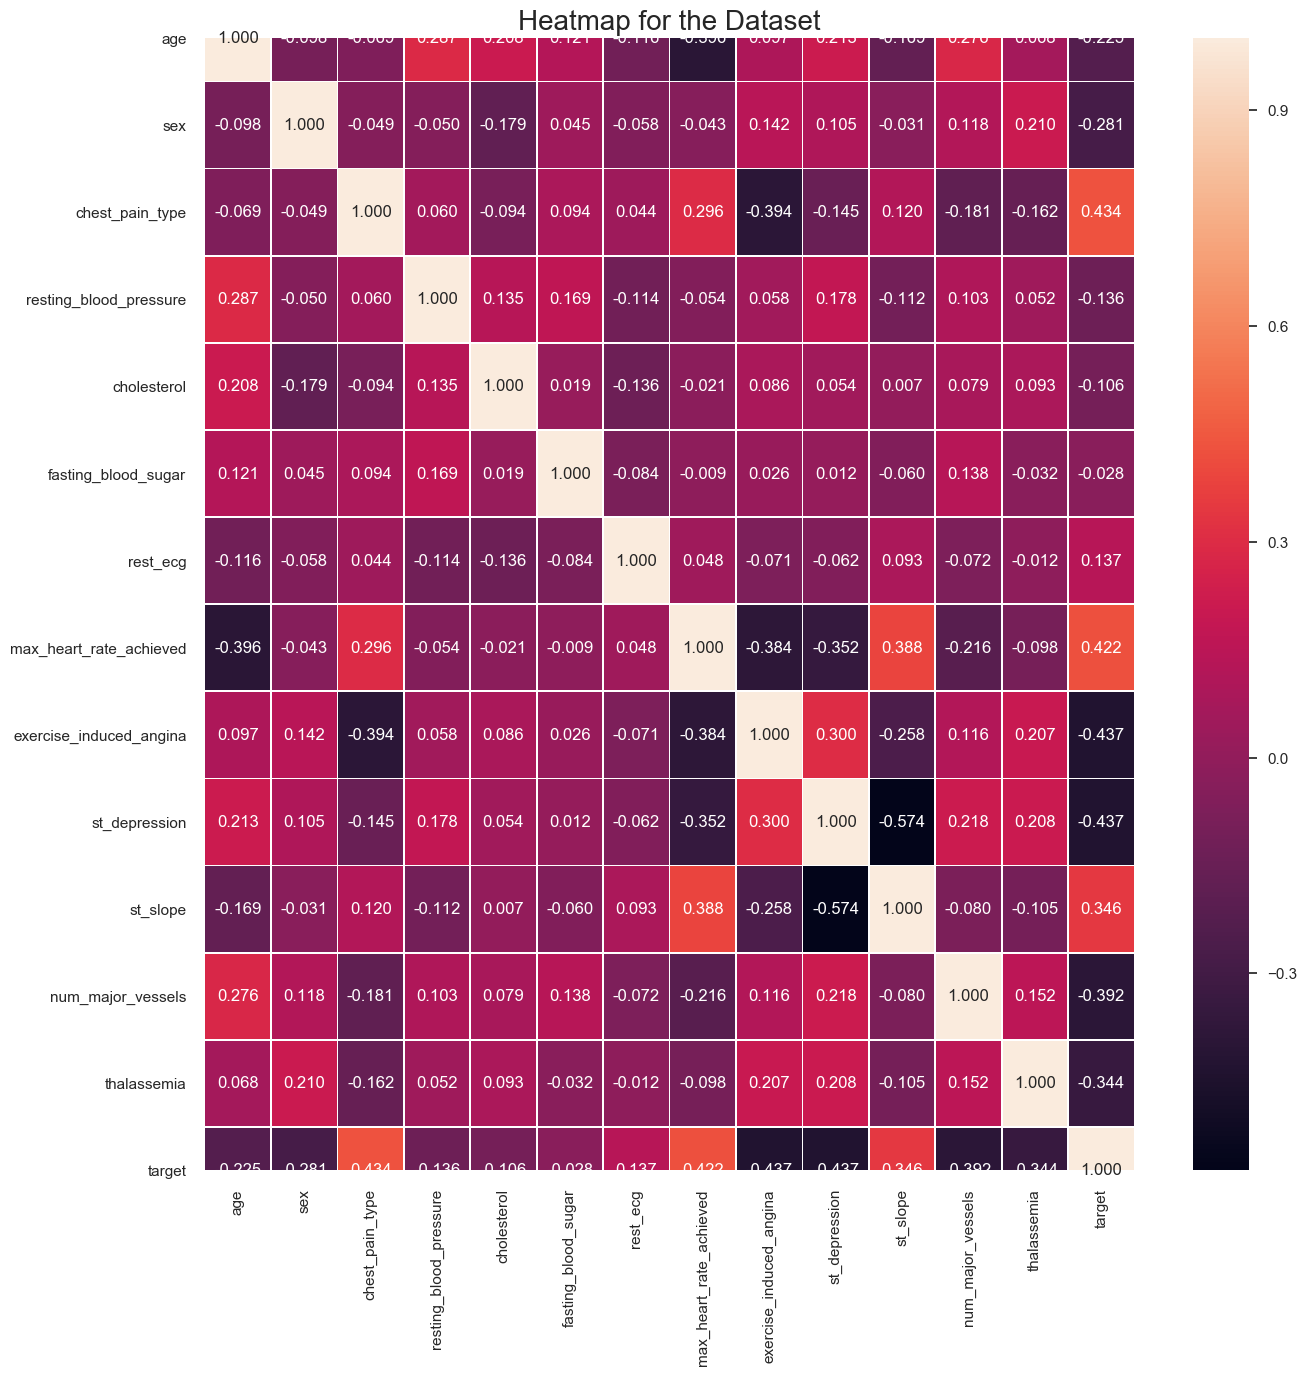

In [352]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot = True, linewidth = .5, fmt = ".3f",ax = ax)
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()